In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def disp(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

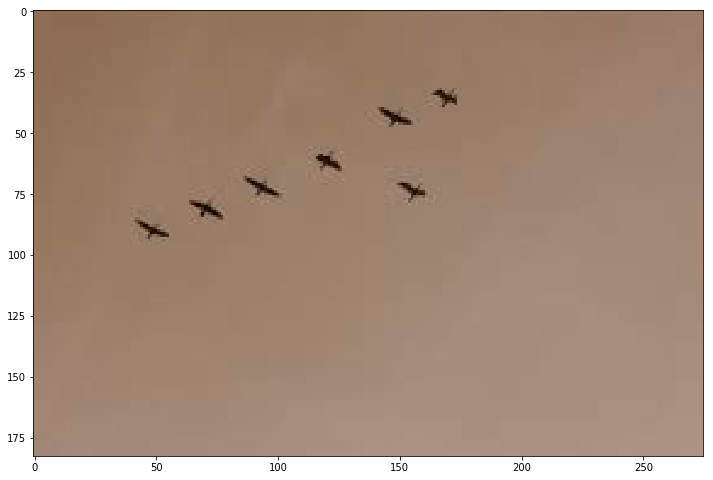

In [3]:
img = cv2.imread("flock2.jpeg")

IMG=np.ones(img.shape[:2],dtype=np.uint8)*255
disp(img)

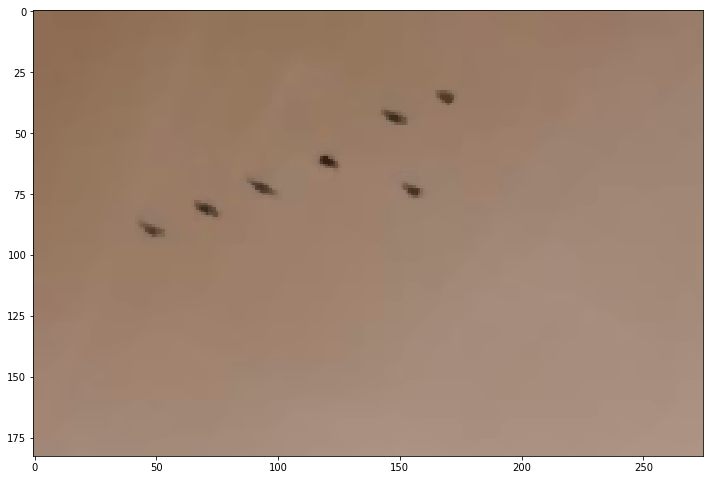

In [4]:
blrimg=cv2.medianBlur(img,5)
disp(blrimg)

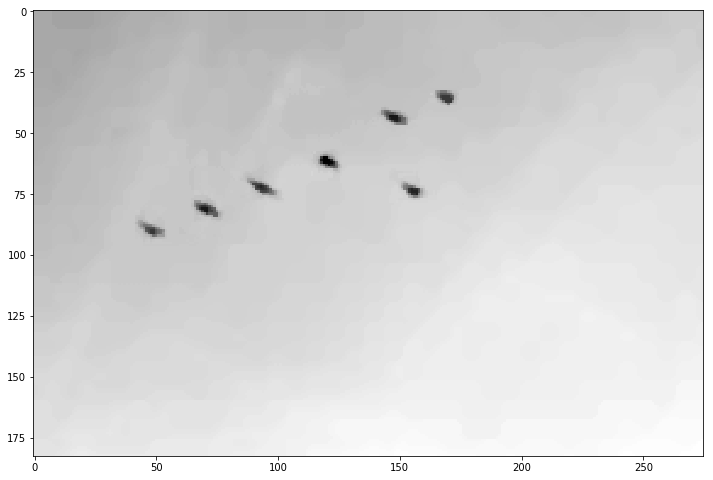

In [15]:
gryimg=cv2.cvtColor(blrimg,cv2.COLOR_BGR2GRAY )
disp(gryimg)

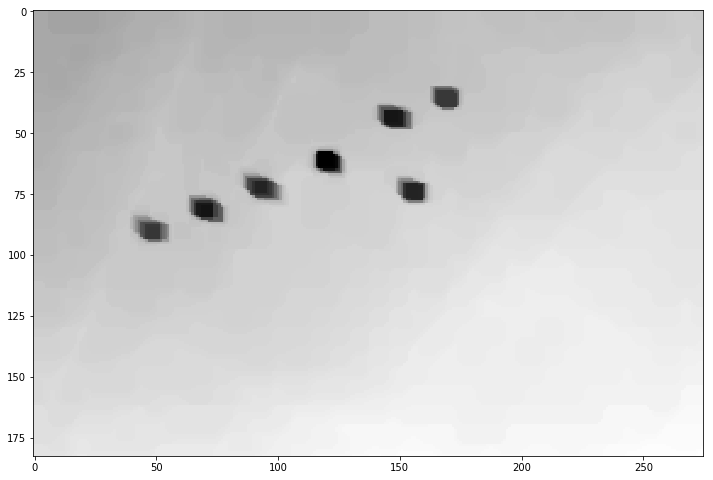

In [6]:
#erosion
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(gryimg, kernel, iterations=1) 
disp(img_erosion)

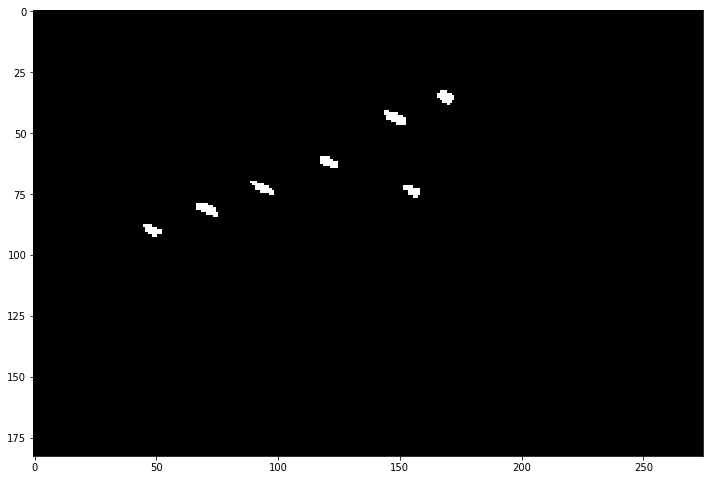

In [14]:
gr=np.array(img_erosion)
#v=np.mean(g)
v=90   #(np.min(gr)+np.max(gr))/2
#v=np.max(g)
#if img.shape==():
th,threshed = cv2.threshold(gryimg,v, 255,cv2.THRESH_BINARY_INV)#|cv2.THRESH_OTSU)
disp(threshed)

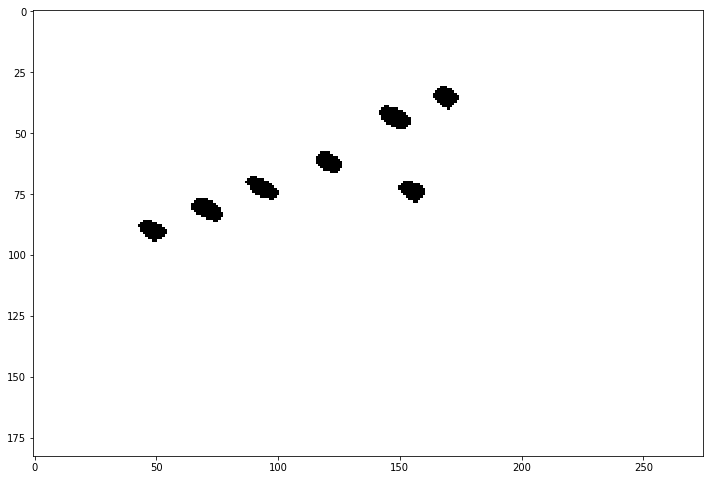

In [8]:
#contours
'''
imgray = cv2.cvtColor(dist_transform,cv2.COLOR_BGR2GRAY)
#imgray=dist_transform
ret,thresh = cv2.threshold(imgray,127,255,0)'''
contours, hierarchy = cv2.findContours(threshed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
'''cnt = contours[4]
cv2.drawContours(IMG, [cnt], 0, (0,255,0), 3)'''
cv2.drawContours(IMG, contours, -1, (0,255,0), 3)
disp(IMG)

In [9]:
s1= 9
s2 = 81
xcnts = []
for cnt in contours:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

Dots number: 7


In [ ]:
dist_transform=cv2.distanceTransform(IMG,cv2.DIST_L2,3)
disp(dist_transform)

In [ ]:
m=dist_transform.max()
row,col=dist_transform.shape
for x in range(row):
    for y in range(col):
        if dist_transform[x][y]==m:
            cv2.circle(IMG,(x,y),7,(0,255,0),-1)
            cv2.imwrite(nn,IMG)
plt.imshow(nn)            

In [ ]:
#cnts,hi = cv2.findContours(dist_transform, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
contours, hierarchy = cv2.findcontours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)(dist_transform,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
cv2.drawContours(IMG, [cnt], 0, (0,255,0), 3)
disp(IMG)

In [ ]:
cnts

In [ ]:
disp(threshed)

In [ ]:
dist_transform=cv2.distanceTransform(thresh1,cv2.DIST_L2,5)
disp(dist_transform)

In [ ]:
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation = cv2.dilate(img, kernel, iterations=3) 
  
cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0) 

In [ ]:
## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [ ]:
## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [ ]:
## filter by area
s1= 5
s2 = 50
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))
#Dots number: 23